In [20]:
# importing necessary libraries
from time import process_time
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import random
import math
from scipy import sparse
from scipy.sparse import random
from scipy import stats
from numpy.random import default_rng
from sklearn.preprocessing import normalize
import numpy as np
import os

In [21]:
# importing algorithm functions
import sys
sys.path.insert(1, '../../scripts/functions')
from method import method

## Testing Algorithm with Various Row Sizes

Test iterations and CPU of different systems (Gaussian, Uniform, 50/50 Gauss-Uniform) for $\mathbb{R}^{m\times 500}$

$m = \{ 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000 \}$

In [22]:
m = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]

### Gaussian

In [23]:
gk_gauss_iter = []
gko_gauss_iter = []
mwrko_gauss_iter = []
gk_gauss_cpu = []
gko_gauss_cpu = []
mwrko_gauss_cpu = []

for row in m:
  # generate system
  A = np.random.randn(row,500)
  x = np.ones(500)
  y = A @ x
  # gk
  gk_start_cyclic_gauss = process_time()
  gk_gaussian = method(A,x,y,'GK', 0.5*10**-8)
  gk_stop_cyclic_gauss = process_time()
  # gko
  gko_start_cyclic_gauss = process_time()
  gko_gaussian = method(A,x,y,'GKO', 0.5*10**-8)
  gko_stop_cyclic_gauss = process_time()
  # mwrko
  mwrko_start_cyclic_gauss = process_time()
  mwrko_gaussian = method(A,x,y,'MWRKO', 0.5*10**-8)
  mwrko_stop_cyclic_gauss = process_time()
  # store data - iteration
  gk_gauss_iter.append(gk_gaussian[0])
  gko_gauss_iter.append(gko_gaussian[0])
  mwrko_gauss_iter.append(mwrko_gaussian[0])
  # store data - cpu
  gk_gauss_cpu.append(gk_stop_cyclic_gauss - gk_start_cyclic_gauss)
  gko_gauss_cpu.append(gko_stop_cyclic_gauss - gko_start_cyclic_gauss)
  mwrko_gauss_cpu.append(mwrko_stop_cyclic_gauss - mwrko_start_cyclic_gauss)

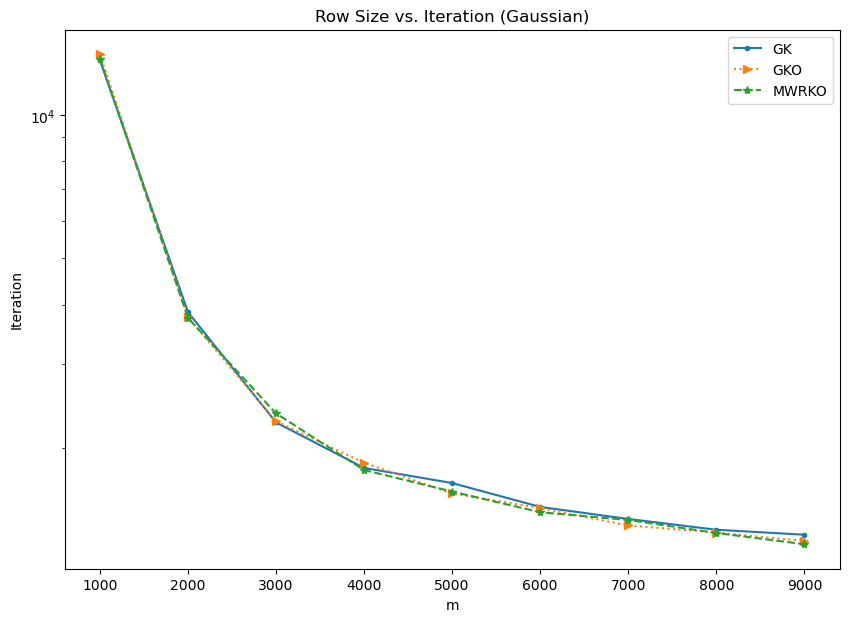

In [24]:
# Row size vs Iteration
plt.figure(figsize=(10,7))

plt.semilogy(m, gk_gauss_iter, linestyle = 'solid', marker='.', label = 'GK')
plt.semilogy(m, gko_gauss_iter, linestyle = 'dotted', marker='>', label = 'GKO')
plt.semilogy(m, mwrko_gauss_iter, linestyle = 'dashed', marker='*', label = 'MWRKO')

plt.xlabel('m')
plt.ylabel('Iteration')
plt.title('Row Size vs. Iteration (Gaussian)')
plt.legend()
plt.savefig('../../outputs/synthetic-exp/sizes-test/iter/size-gauss-iter.png')

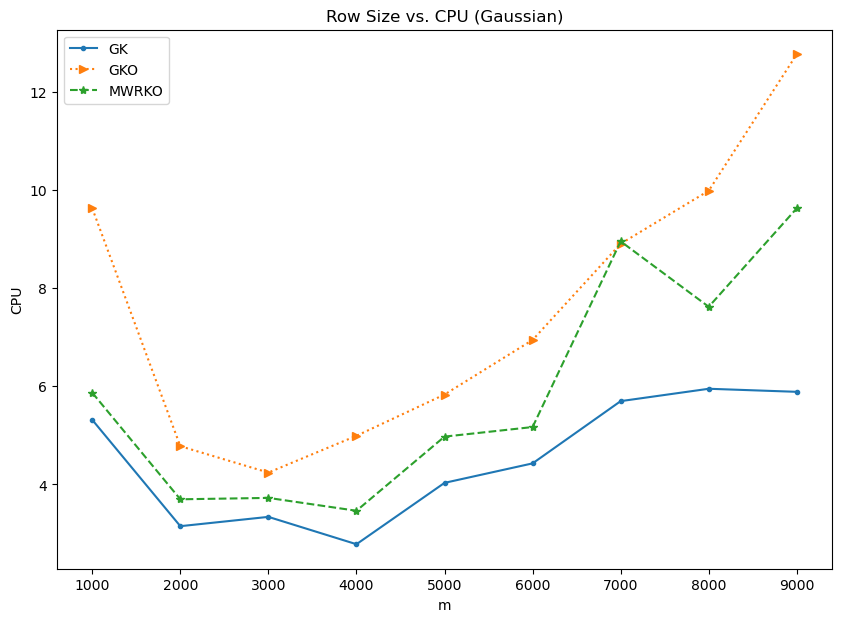

In [25]:
# Row size vs CPU
plt.figure(figsize=(10,7))

plt.plot(m, gk_gauss_cpu, linestyle = 'solid', marker='.', label = 'GK')
plt.plot(m, gko_gauss_cpu, linestyle = 'dotted', marker='>', label = 'GKO')
plt.plot(m, mwrko_gauss_cpu, linestyle = 'dashed', marker='*', label = 'MWRKO')

plt.xlabel('m')
plt.ylabel('CPU')
plt.title('Row Size vs. CPU (Gaussian)')
plt.legend()
plt.savefig('../../outputs/synthetic-exp/sizes-test/cpu/size-gauss-cpu.png')

### Uniform

In [26]:
gk_unif_iter = []
gko_unif_iter = []
mwrko_unif_iter = []
gk_unif_cpu = []
gko_unif_cpu = []
mwrko_unif_cpu = []

for row in m:
  # generate system
  A = np.random.rand(row,500)
  x = np.ones(500)
  y = A @ x
  # gk
  gk_start_cyclic_unif = process_time()
  gk_uniform = method(A,x,y,'GK', 0.5*10**-8)
  gk_stop_cyclic_unif = process_time()
  # gko
  gko_start_cyclic_unif = process_time()
  gko_uniform = method(A,x,y,'GKO', 0.5*10**-8)
  gko_stop_cyclic_unif = process_time()
  # mwrko
  mwrko_start_cyclic_unif = process_time()
  mwrko_uniform = method(A,x,y,'MWRKO', 0.5*10**-8)
  mwrko_stop_cyclic_unif = process_time()
  # store data - iteration
  gk_unif_iter.append(gk_uniform[0])
  gko_unif_iter.append(gko_uniform[0])
  mwrko_unif_iter.append(mwrko_uniform[0])
  # store data - cpu
  gk_unif_cpu.append(gk_stop_cyclic_unif - gk_start_cyclic_unif)
  gko_unif_cpu.append(gko_stop_cyclic_unif - gko_start_cyclic_unif)
  mwrko_unif_cpu.append(mwrko_stop_cyclic_unif - mwrko_start_cyclic_unif)

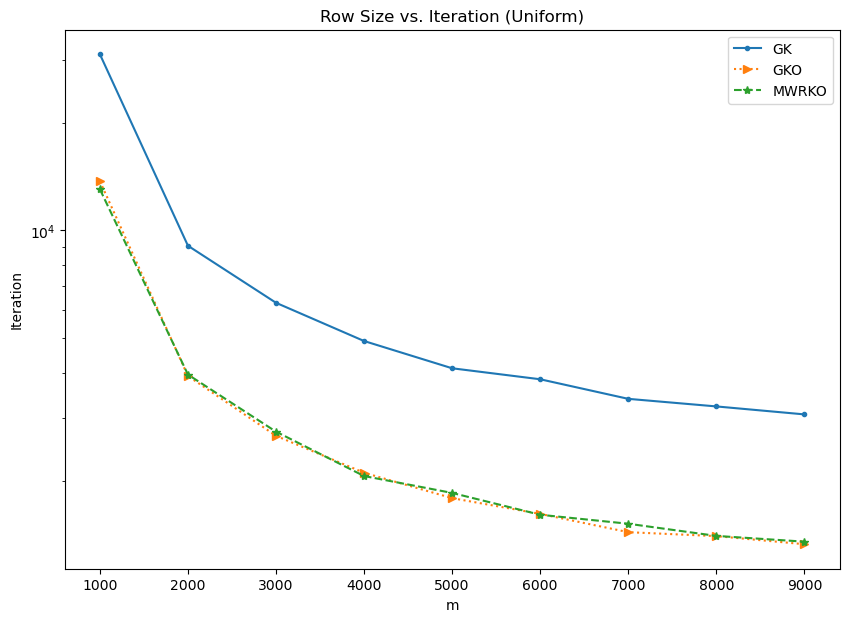

In [27]:
# Row size vs Iteration
plt.figure(figsize=(10,7))

plt.semilogy(m, gk_unif_iter, linestyle = 'solid', marker='.', label = 'GK')
plt.semilogy(m, gko_unif_iter, linestyle = 'dotted', marker='>', label = 'GKO')
plt.semilogy(m, mwrko_unif_iter, linestyle = 'dashed', marker='*', label = 'MWRKO')

plt.xlabel('m')
plt.ylabel('Iteration')
plt.title('Row Size vs. Iteration (Uniform)')
plt.legend()
plt.savefig('../../outputs/synthetic-exp/sizes-test/iter/size-unif-iter.png')

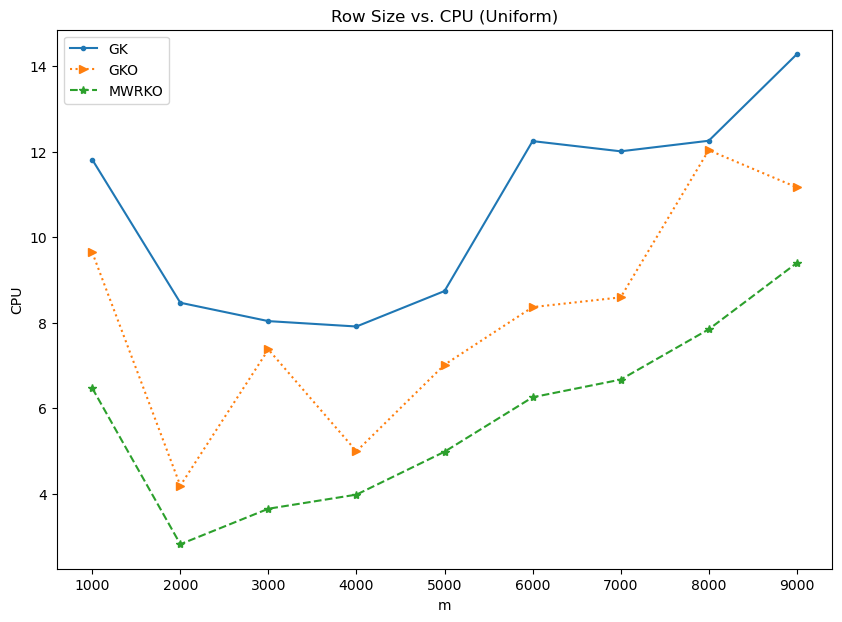

In [28]:
# Row size vs CPU
plt.figure(figsize=(10,7))

plt.plot(m, gk_unif_cpu, linestyle = 'solid', marker='.', label = 'GK')
plt.plot(m, gko_unif_cpu, linestyle = 'dotted', marker='>', label = 'GKO')
plt.plot(m, mwrko_unif_cpu, linestyle = 'dashed', marker='*', label = 'MWRKO')

plt.xlabel('m')
plt.ylabel('CPU')
plt.title('Row Size vs. CPU (Uniform)')
plt.legend()
plt.savefig('../../outputs/synthetic-exp/sizes-test/cpu/size-unif-cpu.png')

### 50/50 Gauss-Uniform

In [29]:
gk_comb_iter = []
gko_comb_iter = []
mwrko_comb_iter = []
gk_comb_cpu = []
gko_comb_cpu = []
mwrko_comb_cpu = []

for row in m:
  # generate system
  A1 = np.random.rand(int(row/2),500)
  A2 = np.random.randn(int(row/2),500)
  A = np.concatenate((A1, A2))
  x = np.ones(500)
  y = A @ x
  # gk
  gk_start_cyclic_comb = process_time()
  gk_comb = method(A,x,y,'GK', 0.5*10**-8)
  gk_stop_cyclic_comb = process_time()
  # gko
  gko_start_cyclic_comb = process_time()
  gko_comb = method(A,x,y,'GKO', 0.5*10**-8)
  gko_stop_cyclic_comb = process_time()
  # mwrko
  mwrko_start_cyclic_comb = process_time()
  mwrko_comb = method(A,x,y,'MWRKO', 0.5*10**-8)
  mwrko_stop_cyclic_comb = process_time()
  # store data - iteration
  gk_comb_iter.append(gk_comb[0])
  gko_comb_iter.append(gko_comb[0])
  mwrko_comb_iter.append(mwrko_comb[0])
  # store data - cpu
  gk_comb_cpu.append(gk_stop_cyclic_comb - gk_start_cyclic_comb)
  gko_comb_cpu.append(gko_stop_cyclic_comb - gko_start_cyclic_comb)
  mwrko_comb_cpu.append(mwrko_stop_cyclic_comb - mwrko_start_cyclic_comb)

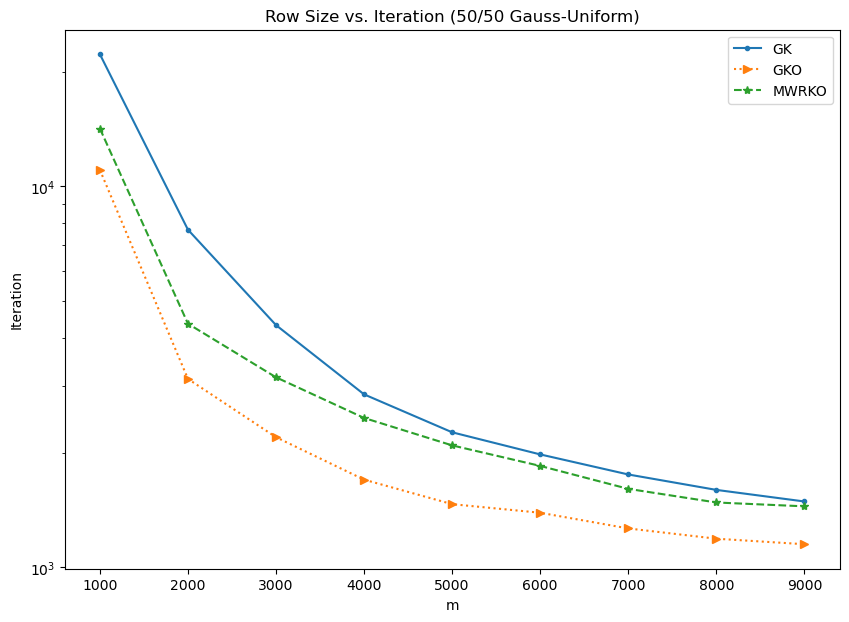

In [30]:
# Row size vs Iteration
plt.figure(figsize=(10,7))

plt.semilogy(m, gk_comb_iter, linestyle = 'solid', marker='.', label = 'GK')
plt.semilogy(m, gko_comb_iter, linestyle = 'dotted', marker='>', label = 'GKO')
plt.semilogy(m, mwrko_comb_iter, linestyle = 'dashed', marker='*', label = 'MWRKO')

plt.xlabel('m')
plt.ylabel('Iteration')
plt.title('Row Size vs. Iteration (50/50 Gauss-Uniform)')
plt.legend()
plt.savefig('../../outputs/synthetic-exp/sizes-test/iter/size-comb-iter.png')

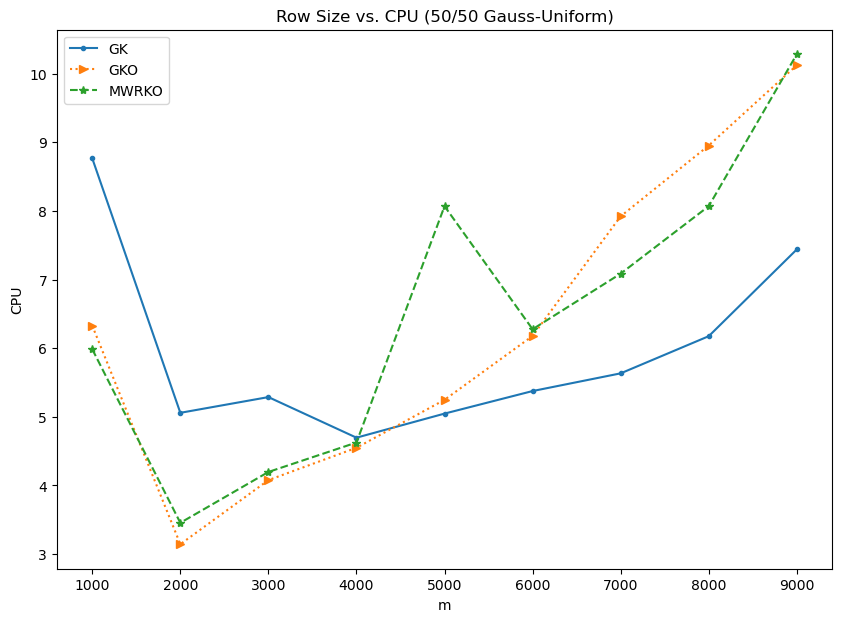

In [31]:
# Row size vs CPU
plt.figure(figsize=(10,7))

plt.plot(m, gk_comb_cpu, linestyle = 'solid', marker='.', label = 'GK')
plt.plot(m, gko_comb_cpu, linestyle = 'dotted', marker='>', label = 'GKO')
plt.plot(m, mwrko_comb_cpu, linestyle = 'dashed', marker='*', label = 'MWRKO')

plt.xlabel('m')
plt.ylabel('CPU')
plt.title('Row Size vs. CPU (50/50 Gauss-Uniform)')
plt.legend()
plt.savefig('../../outputs/synthetic-exp/sizes-test/cpu/size-comb-cpu.png')

### Overall Results

<Figure size 10000x5000 with 0 Axes>

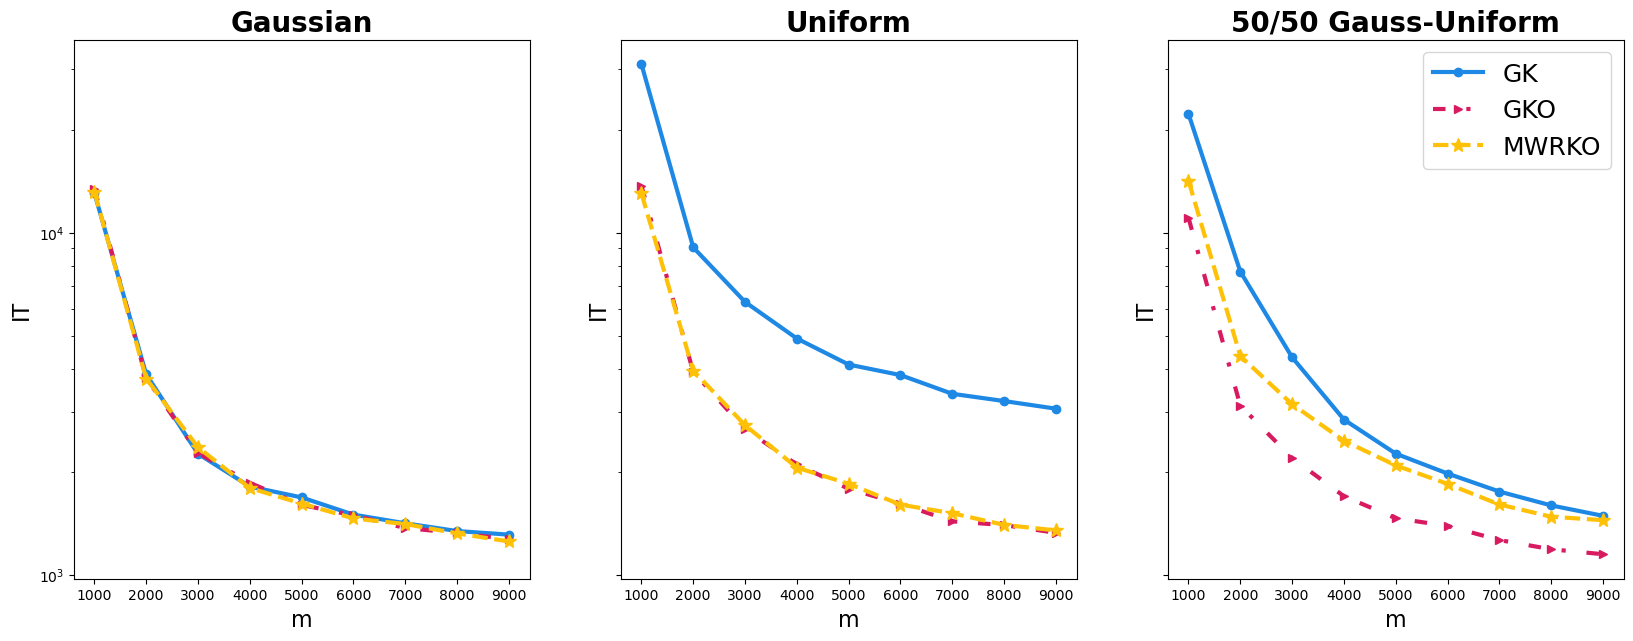

In [32]:
# iteration
plt.figure(figsize=(100, 50))
fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, sharey='row', figsize=(20, 7))

ax1.semilogy(m, gk_gauss_iter, marker='o', color = '#1E88E5', 
             linewidth = 3, linestyle = 'solid', label = 'GK')
ax1.semilogy(m, gko_gauss_iter,marker='>', color = '#D81B60', 
             linewidth = 3, linestyle = (0, (3, 5, 1, 5)), label = 'GKO')
ax1.semilogy(m, mwrko_gauss_iter, marker='*', color = '#FFC107',
             linewidth = 3, linestyle = 'dashed', markersize=10, label = 'MWRKO')
ax1.set_title('Gaussian', fontsize=20, fontweight="bold")
ax1.set_xlabel('m', fontsize=16)
ax1.set_ylabel('IT', fontsize=16)

ax2.semilogy(m, gk_unif_iter, marker='o',color = '#1E88E5', 
             linewidth = 3, linestyle = 'solid', label = 'GK')
ax2.semilogy(m, gko_unif_iter, marker='>', color = '#D81B60', 
             linewidth = 3, linestyle = (0, (3, 5, 1, 5)), label = 'GKO')
ax2.semilogy(m, mwrko_unif_iter, marker='*', color = '#FFC107',
             linewidth = 3, linestyle = 'dashed', markersize=10, label = 'MWRKO')
ax2.set(xlabel='m', ylabel='Iteration', title='Uniform')
ax2.set_title('Uniform', fontsize=20, fontweight="bold")
ax2.set_xlabel('m', fontsize=16)
ax2.set_ylabel('IT', fontsize=16)

ax3.semilogy(m, gk_comb_iter, marker='o',color = '#1E88E5', 
             linewidth = 3, linestyle = 'solid', label = 'GK')
ax3.semilogy(m, gko_comb_iter, marker='>', color = '#D81B60', 
             linewidth = 3, linestyle = (0, (3, 5, 1, 5)), label = 'GKO')
ax3.semilogy(m, mwrko_comb_iter, marker='*', color = '#FFC107',
             linewidth = 3, linestyle = 'dashed', markersize=10, label = 'MWRKO')
ax3.set(xlabel='m', ylabel='Iteration', title='50/50 Gauss-Uniform')
ax3.set_title('50/50 Gauss-Uniform', fontsize=20, fontweight="bold")
ax3.set_xlabel('m', fontsize=16)
ax3.set_ylabel('IT', fontsize=16)

plt.legend(fontsize="18")
plt.savefig('../../outputs/synthetic-exp/sizes-test/iter/size-iter.png')
plt.show()

<Figure size 10000x5000 with 0 Axes>

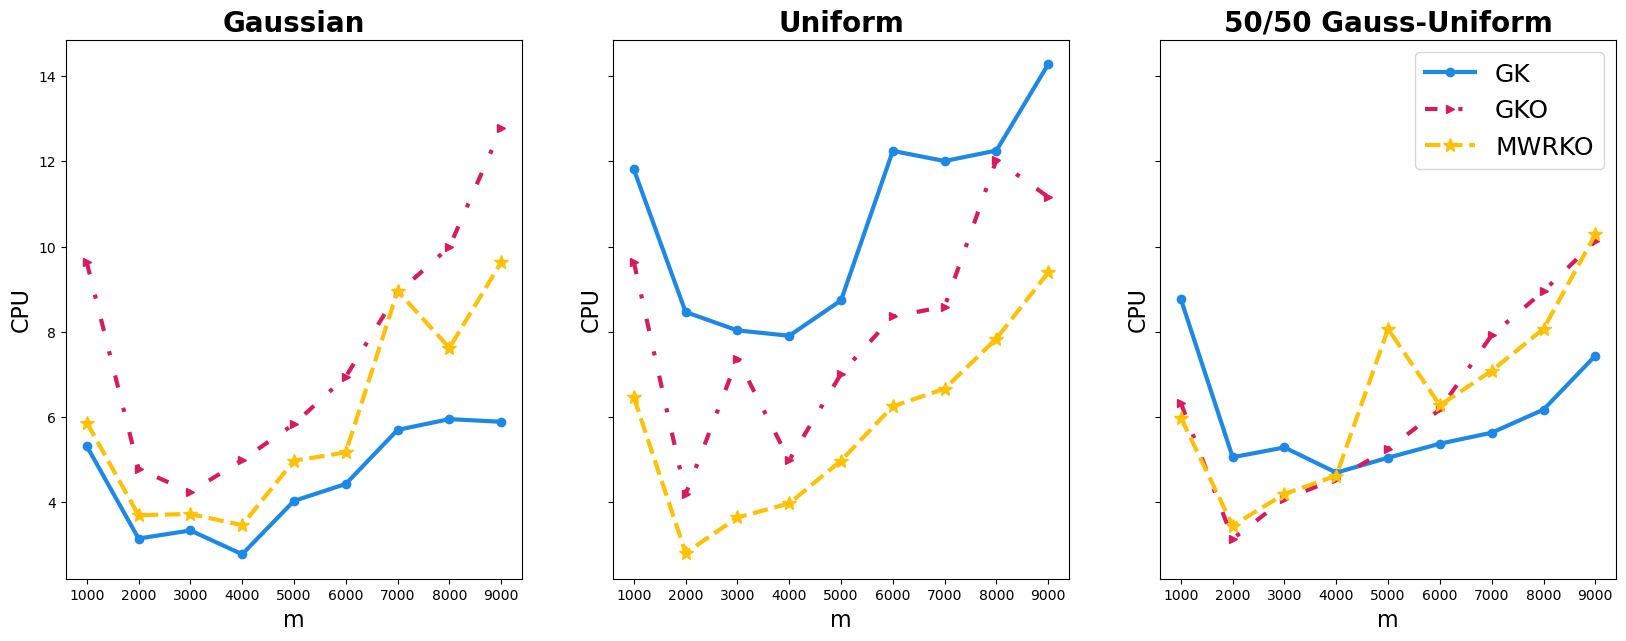

In [33]:
# CPU
plt.figure(figsize=(100, 50))
fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, sharey='row', figsize=(20, 7))

ax1.plot(m, gk_gauss_cpu, marker='o', color = '#1E88E5', 
             linewidth = 3, linestyle = 'solid', label = 'GK')
ax1.plot(m, gko_gauss_cpu,marker='>', color = '#D81B60', 
             linewidth = 3, linestyle = (0, (3, 5, 1, 5)), label = 'GKO')
ax1.plot(m, mwrko_gauss_cpu, marker='*', color = '#FFC107',
             linewidth = 3, linestyle = 'dashed', markersize=10, label = 'MWRKO')
ax1.set_title('Gaussian', fontsize=20, fontweight="bold")
ax1.set_xlabel('m', fontsize=16)
ax1.set_ylabel('CPU', fontsize=16)

ax2.plot(m, gk_unif_cpu, marker='o',color = '#1E88E5', 
             linewidth = 3, linestyle = 'solid', label = 'GK')
ax2.plot(m, gko_unif_cpu, marker='>', color = '#D81B60', 
             linewidth = 3, linestyle = (0, (3, 5, 1, 5)), label = 'GKO')
ax2.plot(m, mwrko_unif_cpu, marker='*', color = '#FFC107',
             linewidth = 3, linestyle = 'dashed', markersize=10, label = 'MWRKO')
ax2.set(xlabel='m', ylabel='Iteration', title='Uniform')
ax2.set_title('Uniform', fontsize=20, fontweight="bold")
ax2.set_xlabel('m', fontsize=16)
ax2.set_ylabel('CPU', fontsize=16)

ax3.plot(m, gk_comb_cpu, marker='o',color = '#1E88E5', 
             linewidth = 3, linestyle = 'solid', label = 'GK')
ax3.plot(m, gko_comb_cpu, marker='>', color = '#D81B60', 
             linewidth = 3, linestyle = (0, (3, 5, 1, 5)), label = 'GKO')
ax3.plot(m, mwrko_comb_cpu, marker='*', color = '#FFC107',
             linewidth = 3, linestyle = 'dashed', markersize=10, label = 'MWRKO')
ax3.set(xlabel='m', ylabel='Iteration', title='50/50 Gauss-Uniform')
ax3.set_title('50/50 Gauss-Uniform', fontsize=20, fontweight="bold")
ax3.set_xlabel('m', fontsize=16)
ax3.set_ylabel('CPU', fontsize=16)

plt.legend(fontsize="18")
plt.savefig('../../outputs/synthetic-exp/sizes-test/cpu/size-cpu.png')
plt.show()

In [34]:
import pandas as pd
df = pd.DataFrame()
df['m'] = m
df['mwrko'] = mwrko_unif_iter
df

,m,mwrko
0,1000,13029
1,2000,3954
2,3000,2739
3,4000,2059
4,5000,1847
5,6000,1605
6,7000,1515
7,8000,1401
8,9000,1350
